Loop functions: 100%|████████████████████████████| 2/2 [00:06<00:00,  3.32s/it]


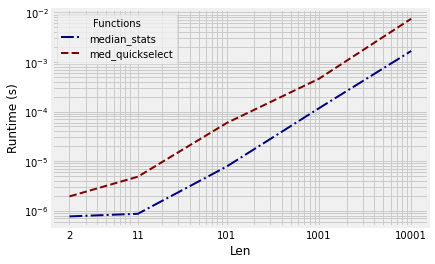

In [1]:
from statistics import median
from random import randint
import numpy as np
import benchit
import sys

def median_stats(arr):
    return median(arr)

def median_quickselect_(arr):
    n = len(arr)
    k = n // 2 + 1
    return kthSmallest(arr, 0, n - 1, k)

def med_quickselect(x):
    # wrapper for median_quickselect_ where we pass a copy of the data
    return median_quickselect_(x[:])

# Python3 program of Quick Select 

# Standard partition process of QuickSort(). 
# It considers the last element as pivot 
# and moves all smaller element to left of 
# it and greater elements to right 
def partition(arr, l, r): 
    x = arr[r] 
    i = l 
    for j in range(l, r): 
        
        if arr[j] <= x: 
            arr[i], arr[j] = arr[j], arr[i] 
            i += 1
            
    arr[i], arr[r] = arr[r], arr[i] 
    return i 

# finds the kth position (of the sorted array) 
# in a given unsorted array i.e this function 
# can be used to find both kth largest and 
# kth smallest element in the array. 
# ASSUMPTION: all elements in arr[] are distinct 
def kthSmallest(arr, l, r, k): 

    # if k is smaller than number of 
    # elements in array 
    if (k > 0 and k <= r - l + 1): 

        # Partition the array around last 
        # element and get position of pivot 
        # element in sorted array 
        index = partition(arr, l, r) 

        # if position is same as k 
        if (index - l == k - 1): 
            return arr[index] 

        # If position is more, recur 
        # for left subarray 
        if (index - l > k - 1): 
            return kthSmallest(arr, l, index - 1, k) 

        # Else recur for right subarray 
        return kthSmallest(arr, index + 1, r, 
                            k - index + l - 1) 
    return sys.max 


funcs = [median_stats, med_quickselect] 
inputs = [[randint(0, 1000000) for _ in range(i+1)] for i in 10**np.arange(5)]

t = benchit.timings(funcs, inputs)
t.plot(logy=True, logx=True)